# Results of different f values

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
results = pd.read_csv('./f_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.groupby(['planner','f','num_agents'], as_index=False).mean()
results.head()

,planner,f,num_agents,num_robots,d,completion_time,planner_time,damage,num_disabled
0,BottomUpScannerPlanner,1.1,200,10.0,5.0,279.360568,0.009964,46447.488214,36.3
1,BottomUpScannerPlanner,1.2,200,10.0,5.0,257.218567,0.010772,40570.554464,79.2
2,BottomUpScannerPlanner,1.3,200,10.0,5.0,240.920088,0.015548,35173.689684,117.5
3,BottomUpScannerPlanner,1.4,200,10.0,5.0,225.035047,0.009483,30379.232721,148.6
4,BottomUpScannerPlanner,1.5,200,10.0,5.0,210.286763,0.011096,26223.865855,175.1


In [19]:
num_agents = 200

results = results.loc[results['num_agents']==num_agents]

planners_names = ['IterativeAssignmentPlanner', 'KmeansAssignmentPlanner',
                  'StaticLinePlanner', 'BottomUpScannerPlanner']

colors = ['tab:red','tab:brown','tab:blue','tab:orange','tab:green']

planners_results = [results.loc[results['planner']==name] for name in planners_names]

## Experiments

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* agent num n is 300

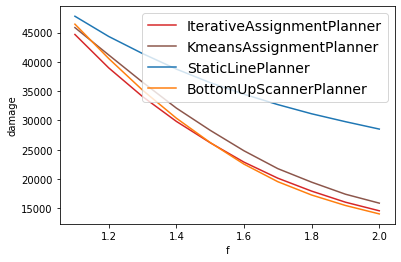

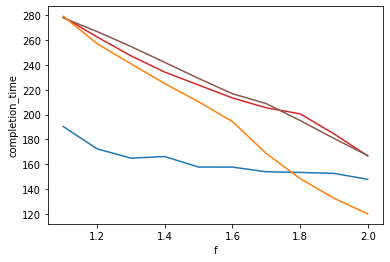

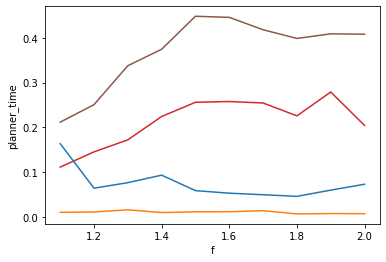

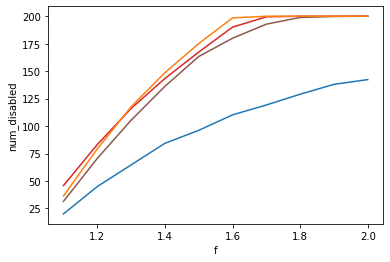

In [20]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['f' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for j in range(len(planners_results)):
        r = planners_results[j]
        plt.plot(list(r[x]),list(r[y]), c=colors[j])

    if i == 0:
        plt.legend(planners_names, fontsize='14')

    plt.savefig(f'./plots/{x}-{y}.png')
    plt.show()